# [E-09] Pneumonia Detection with CNN

## 폐렴 진단기 성능 개선

* 최근 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있음

### 학습 목표
* 의료 영상 처리를 위해서 필요한 의료 도메인 지식 및 의료 영상에 대한 이해를 위한 기초 상식 쌓기
* 실제로 의료 영상 데이터를 처리하는 실습하기

### 목차
#### 1. 들어가며
  1-1. 의료 영상 종류     
  1-2. X-Ray 이미지     
  1-3. 의료 영상 분석과 일반 이미지 처리와 다른 점     

#### 2. 폐렴과 성능개선 방법
  2-1. 데이터셋     
  2-2. 폐렴이란?     
  2-3. 폐렴 구별법     
  2-4. 성능 개선 방법     

#### 3. 폐렴 진단기 성능개선 
  3-1. 실험환경 Set-up     
  3-2. 데이터 가져오기     
  3-3. 데이터 시각화     
  3-4. CNN 모델링     
  3-5. 데이터 imbalance 처리     
  3-6. 모델 훈련     
  3-7. 결과 확인     

#### 4. 회고
  4-1. 결과     
  4-2. 이번 프로젝트에서 어려웠던 점     
  4-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점     
  4-4. 루브릭 평가 지표를 맞추기 위해 시도한 것들     
  4-5. 앞으로 더 공부할 내용     
  4-6. 궁금한 사항     
  4-7. 참고사이트     


### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 의료영상을 처리하는 CNN 기반 딥러닝 모델이 잘 구현되었다.|모델 학습이 안정적으로 수렴하는 것을 시각화를 통해 확인하였다.|
|2. 데이터 준비, 모델구성 등의 과정의 다양한 실험이 체계적으로 수행되었다.|regularization, augmentation 등의 기법의 사용 여부에 따른 모델 성능 측정이 ablation study 형태로 체계적으로 수행되었다.|
|3. 실습코드를 잘 개선하여 폐렴 검출 정확도가 추가로 향상되었다.|Accuracy 기준 85%에 도달하였다.|   
<br/>

----


## 1. 들어가며
### 1-1. 의료 영상 종류
* X-Ray
  * 전자를 물체에 충돌시킬 때 발생하는 투과력이 강한 복사선(전자기파)
  * 방사선의 일종으로 지방, 근육, 천, 종이같이 밀도가 낮은 것은 수월하게 통과하지만, 밀도가 높은 뼈, 금속 같은 물질은 잘 통과하지 못함
* CT
  * Computed Tomography의 줄임말로, 환자를 중심으로 X-RAY를 빠르게 회전하여 3D 이미지를 만들어내는 영상입니다. 환자의 3 차원 이미지를 형성하여 기본 구조는 물론 가능한 종양 또는 이상을 쉽게 식별하고 위치를 파악
  * Slice는 단층 촬영 이미지라고도 하며 기존의 X-RAY보다 더 자세한 정보를 포함
* MRI
  * Magnetic Resonance Imaging(자기 공명 영상)의 줄임말로 신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상 기술
  * MRI 스캐너는 강한 자기장를 사용하여 신체 기관의 이미지를 생성
  * CT, X-RAY와 다르게 방사선을 사용하지 않아서 방사선의 위험성에서는 보다 안전
  
### 1.2 X-Ray 이미지
  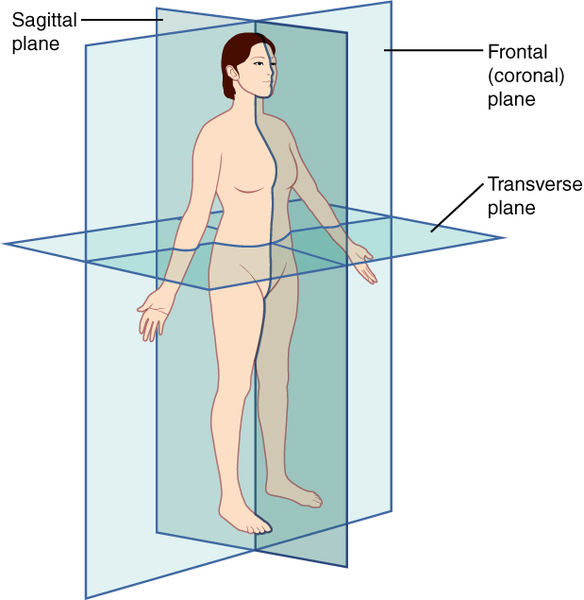
  
  * Sagittal plane : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면. 
  * Coronal plane : 관상면. 인체를 앞뒤로 나누는 면.
  * Transverse plane : 횡단면(수평면). 인체를 상하로 나누는 면.

#### X-Ray 특성
  * 뼈 : 하얀색
  * 근육 및 지방 : 연한 회색
  * 공기 : 검은색

  * 갈비뼈 : 하얀색
  * 폐 : 검은색
  * 어깨 쪽의 지방 및 근육 : 연한 회색


### 1.3 의료 영상 분석과 일반 이미지 처리와 다른 점
* 의료 영상 이미지는 개인 정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않음
* 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비쌈
* 희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 어려움
* 음성/양성 데이터 간 imbalance가 심해서 학습에 주의가 필요함
* 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 가능성이 있음

#### 이용할 데이터셋
* Chest X-Ray Images (Pneumonia)
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


## 2. 폐렴과 성능개선 방법
### 2-1. 데이터셋
#### 캐글의 Chest X-Ray Images
* 3개의 폴더 (train, test, val)로 구성
* 각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함
* 5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상)으로 구성
* 전체 데이터의 크기는 총 1.2GB 
* 위 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5세 소아 환자의 흉부 X선 영상

### 2-2. 폐렴이란?
* 폐렴(pneumonia 뉴모니아)은 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다. 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인

### 2-3. 폐렴 구별법
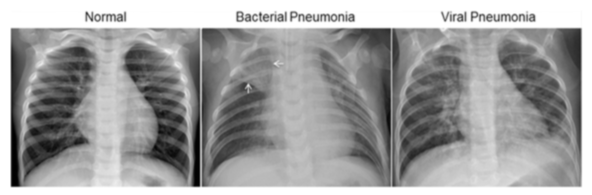
* 정상적인 흉부 X-RAY(왼쪽)는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐
* 세균성 폐렴 (가운데)은 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 있는 나타남
* 바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산된 "interstitial(조직 사이에 있는)" 패턴으로 나타남


----

### 2-4. 성능 개선 방법
* 폐렴 진단에서 80%정도는 맞출 수 있게 됨
* 구하기 어렵고 구하더라도 데이터가 작은 의료데이터는 Data augmentation 방법을 많이 시도함
* 이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용.
* 장기의 크기는 사람마다 거의 바뀌지 않음! 이런 특성을 이용한 방법이 노이즈 추가 방법.

* 전통적인 Data augmentation 방법 이외에도 GAN을 이용해서 Data augmentation을 시도
* 숙련된 의사들의 폐렴 진단 정확도는 90% 이상. 숙련된 의사만큼의 정확도를 달성해보기!


## 3. 실제로 해보기
### 3-1. 실험환경 Set-up

* Batch size, Epoch 등 변경해보기

#### 필요한 패키지(라이브러리) import

In [1]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

#### 필요한 변수들 생성

In [2]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel/Exploration/E_09')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 35

print(ROOT_PATH)

/aiffel/aiffel/Exploration/E_09


### 3-2. 데이터 가져오기

In [3]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


* train : 5216개
* test : 624
* val : 16개

* 개수 비는 89%, 10.7%, 0.3% 


In [4]:
# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


In [5]:
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/Exploration/E_09/chest_xray/data/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
Pneumonia image path
/aiffel/aiffel/Exploration/E_09/chest_xray/data/train/PNEUMONIA/person299_bacteria_1418.jpeg


In [6]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1072
Pneumonia images count in training set: 3113


* 정상보다 폐렴 이미지 수가 3배 더 많음
* 우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을수록 training을 잘 함
* 데이터가 클래스 불균형(imbalance)한 것은 차후에 조정할 예정
* test와 val 데이터셋은 평가하기 위해서 사용되기 때문에 학습과 관련이 없으므로 imbalance한 데이터 셋이어도 문제없음

#### tf.data 인스턴스 만들기
* tf.data는 tensorflow에서 학습시킬 때, mini-batch로 작업할 수 있도록 해 줌
* Batch Size 란 머신러닝이 데이터를 학습하는 과정에서 최적화(Gradient descent) 할 때 한번에 몇개의 데이터를 가지고 하는 지를 나타낸다.
* 데이터가 엄청나게 많은 경우 전체데이터를 보고 최적화를 할 때 엄청난 시간이 할애할 수 있다.
* 그래서 정확도는 좀 떨어지지만 Batch Size를 줄여서 시간을 단축시키는 것이다.


In [7]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [8]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


In [9]:
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

* 이미지의 사이즈를 통일 시키고 GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈를 줄여보기
* decode_img 함수와 process_path 함수 생성

* process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고 사이즈를 변경
* get_label을 이용해서 라벨 값을 가져오기

In [10]:
# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

#### train 데이터 셋과 validation 데이터 셋을 만들기
* num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE변수를 이용하면 더욱 빠르게 데이터를 처리해 줄 수 있음

In [11]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#### 이미지 리사이징과 라벨 확인

In [12]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


#### test 데이터셋도 만들기 및 개수 확인

In [13]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


#### Tensorflow에서는 tf.data 파이프라인
* 학습 데이터를 효율적으로 사용할 수 있도록 해줌
* tf.data 파이프라인을 이용하여 prepare_for_training( ) 함수를 정의해서 데이터 변환시켜줌

* shuffle()을 사용하며 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택
* repeat()를 사용하면 epoch를 진행하면서 여러 번 데이터셋을 불러오게 되는데, 이때 repeat()를 사용한 데이터셋의 경우 여러 번 데이터셋을 사용할 수 있게 해줌
* batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 배치로 주어짐
* prefetch()를 사용하면 학습 데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있음


In [14]:
# def prepare_for_training(ds, shuffle_buffer_size=1000):
#     ds = ds.shuffle(buffer_size=shuffle_buffer_size)
#     ds = ds.repeat()
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

# train_ds = prepare_for_training(train_ds)
# val_ds = prepare_for_training(val_ds)

#### Augmentation 기법으로 좌우 반전
* 영상데이터의 대표적인 데이터 증강방법은 상하좌우 반전, 밝기조절 등이 있음

In [15]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가되었습니다.
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

### 3-3. 데이터 시각화

* 데이터를 보기 위해 먼저, train에 있는 batch 중 첫 번째 배치를 추출
* 추출된 배치를 image와 label 데이터 셋으로 나누기
* show_batch() 함수를 이용해서 결과 사진을 보기

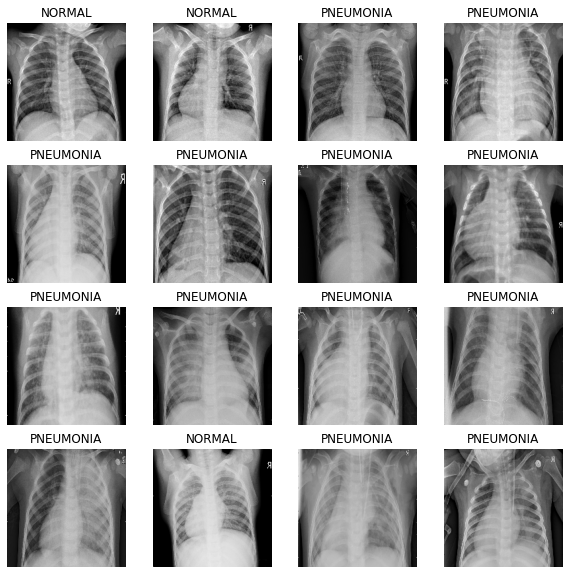

In [16]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

### 3-4. CNN 모델링
* 이미지 처리에 특화된 딥러닝 모델인 CNN을 통해 모델링을 하고 결과를 만들기

#### Convolution block을 만들기
* conv_block()의 구성은 Convolution을 두 번 진행하고 Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결
* Max Pooling 진행

In [17]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

#### Dense Block 만들기

* 원래 노드에서 Batch Normalization과 Dropout이라는 두 가지 regularization 기법이 동시에 사용했는데, 둘다 사용하는 것이 어울리지 않는다고 주장하는 논문도 있어서 이번에는 dropout을 제거함


In [18]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate) 
    ])
    
    return block

In [19]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 3-5. 데이터 imbalance 처리
* 한 라벨이 너무 많은 경우를 imbalance 하다고 하는데, 데이터를 학습할 때 imbalance한 데이터의 경우 학습 효과가 좋지 않을 수 있음

#### Weight balancing
* 데이터 imbalance 를 해결하기 위해 사용하는 테크닉
* training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법
* Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight 에 이러한 클래스별 가중치를 세팅할 수 있도록 지원

In [20]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.95
Weight for PNEUMONIA: 0.67


### 3-6. 모델 훈련
* GPU를 선택. 모델은 위에서 만들었던 모델 함수인 build_model()을 model에 선언
* 이미지의 라벨이 두 개밖에 없기 때문에 "binary_cross entropy" loss를 사용
* optimizer로 'adam'을 사용
* 성과에 대해서 측정하기 위한 metrics으로 'accuracy', 'precision', 'recall'을 사용

In [21]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

#### 모델 fit 

In [22]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/35
261/261 [==============================] - 63s 193ms/step - loss: 0.3739 - accuracy: 0.8106 - precision: 0.9516 - recall: 0.7853 - val_loss: 0.7074 - val_accuracy: 0.7356 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 2/35
261/261 [==============================] - 50s 193ms/step - loss: 0.2721 - accuracy: 0.8920 - precision: 0.9650 - recall: 0.8871 - val_loss: 1.0678 - val_accuracy: 0.7365 - val_precision: 0.7365 - val_recall: 1.0000
Epoch 3/35
261/261 [==============================] - 51s 195ms/step - loss: 0.1870 - accuracy: 0.9270 - precision: 0.9775 - recall: 0.9230 - val_loss: 0.2213 - val_accuracy: 0.8942 - val_precision: 0.8741 - val_recall: 1.0000
Epoch 4/35
261/261 [==============================] - 51s 196ms/step - loss: 0.1941 - accuracy: 0.9298 - precision: 0.9750 - recall: 0.9296 - val_loss: 0.2562 - val_accuracy: 0.8942 - val_precision: 0.8751 - val_recall: 0.9987
Epoch 5/35
261/261 [==============================] - 53s 202ms/step - loss: 0.1679 - accura

### 3-7. 결과 확인

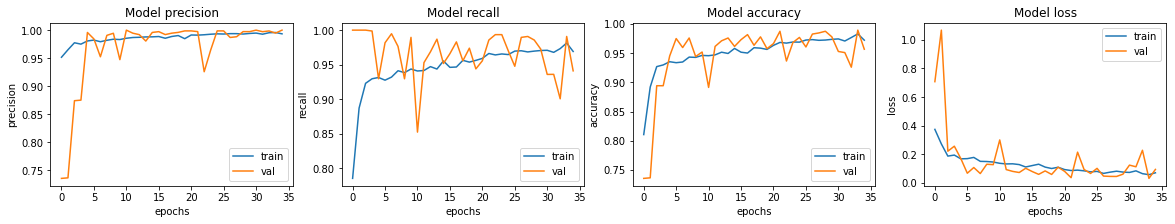

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

#### 테스트 데이터로 모델 평가하기
* 모델 평가를 위해 loss, accuracy, precision, recall 값 출력


In [24]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 5s 117ms/step - loss: 0.5906 - accuracy: 0.8622 - precision: 0.8423 - recall: 0.9590
Loss: 0.5906360149383545,
Accuracy: 0.8621794581413269,
Precision: 0.8423423171043396,
Recall: 0.9589743614196777


## 4. 회고
### 4-1. 결과
(1) 첫번째 시도 
* 노드 그대로 실행
  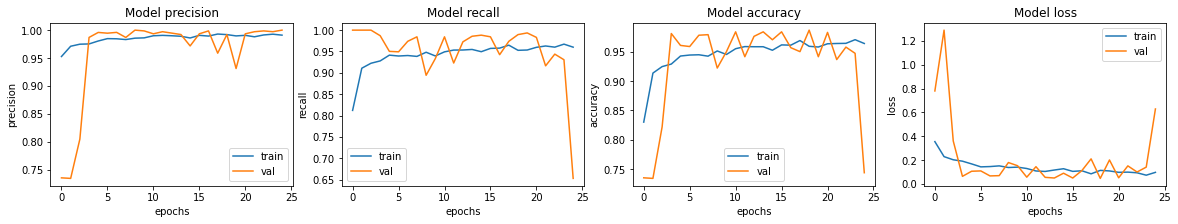
Loss: 0.42 / Accuracy: 0.81 / Precision: 0.95 / Recall: 0.73

(2) 두번째 시도
* Epoch 35으로 조절
  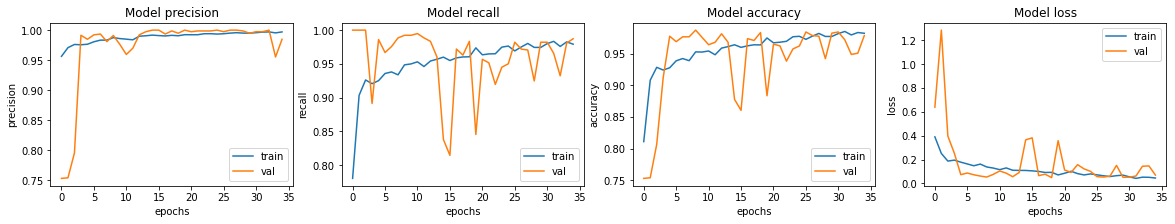
Loss: 1.96 / Accuracy: 0.74 / Precision: 0.71 / Recall: 0.99

(3) 세번째 시도
* Epoch 35 & Data Augmentation 좌우 반전 
  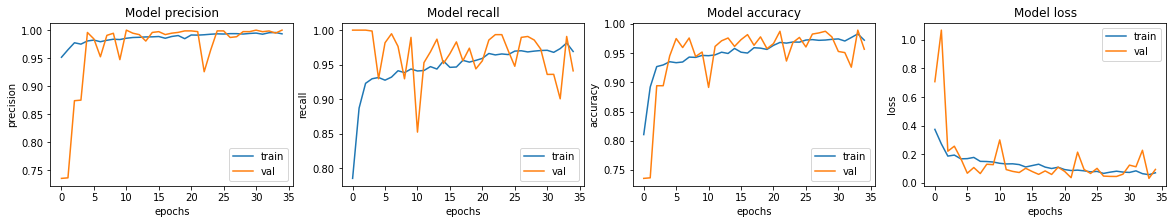
Loss: 0.59 / Accuracy: 0.86 / Precision: 0.84 / Recall: 0.96

(4) 네번째 시도
* Epoch 35 & 좌우 반전 & Dropout 제거
  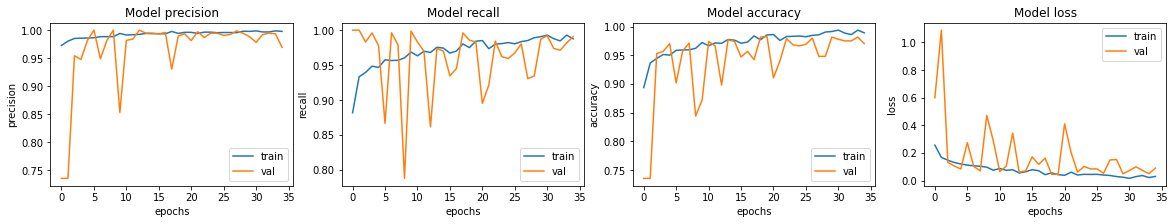
Loss: 4.83 / Accuracy: 0.70 / Precision: 0.67 / Recall: 1.0

(5) 다섯번째 시도
* Epoch 35 & 좌우 반전 & Dropout 제거 * Class Weight 생략
  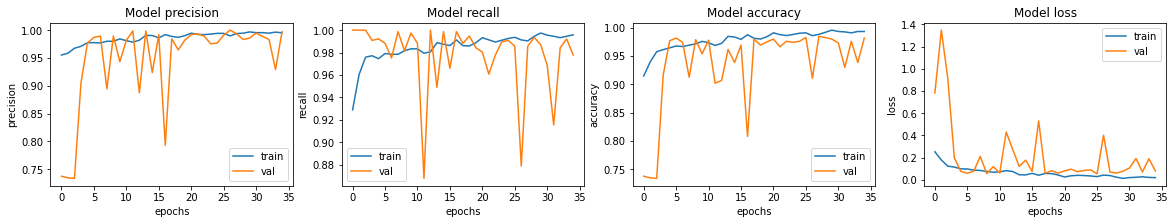
Loss: 1.33 / Accuracy: 0.80 / Precision: 0.76 / Recall: 0.98

(6) 여섯번째 시도
* Epoch 35 & Dropout 제거 & Class Weight 생략
  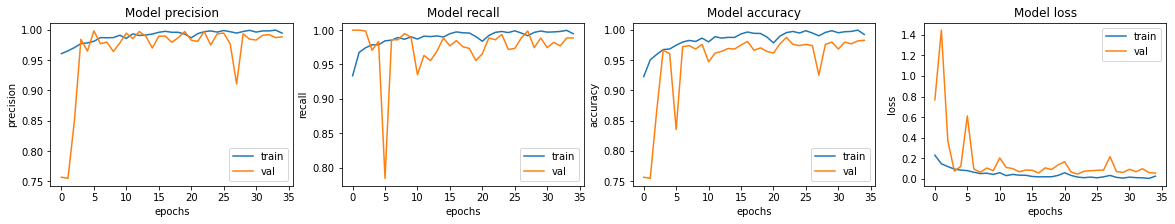
Loss: 1.57 / Accuracy: 0.77 / Precision: 0.73 / Recall: 0.99 

#### 정리
세번째 시도에서 루브릭 평가 기준을 만족했습니다. 여러가지 다른 시도를 더 해보았지만 노드에서 제안했던 방법을 모두 시도했을 때 나온 정확도 80%가 가장 높은 성능이어서 **세번째 시도 정확도 86%**로 제출합니다. 
### 4-2. 이번 프로젝트에서 어려웠던 점
* 데이터 준비, 모델 훈련 등 코드를 작성하고 실행시키는 데는 어려움이 없었습니다.   
* 하지만 전부터 어려웠던 Epoch, Batch Size를 변경하는 것은 아직 정확히 이해가 되지 않은 상황에서 숫자만 바꿔보는 것 같아서 어떤 의미가 있는지 고민을 할 필요가 있다고 생각하게 되었습니다. 


### 4-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점
* 데이터 증강을 위해 사용하는 Data Augmentation 기법에 대해 새롭게 알게 되었습니다.    
* Ablation study: 모델이나 알고리즘을 구성하는 다양한 구성요소(component) 중 어떠한 “feature”를 제거할 때, 성능(performance)에 어떠한 영향을 미치는지 파악하는 방법

### 4-4. 루브릭 평가 지표를 맞추기 위해 시도한 것들
* Epoch 값 변경 25 > 35    
* Augmentation으로 데이터 좌우 반전


### 4-5. 앞으로 더 공부할 내용
* Data Augmentation 관련 논물을 꼼꼼히 읽어보아야겠어요!   


### 4-6. 궁금한 사항
* 적절한 Epoch, Batch Size 값 찾기
* 두 번째 시도에서 세 번째 시도로 넘어가며 정확도는 올라갔지만 재현율이 내려갔습니다. 


### 4-7. 참고사이트
* 딥러닝 기반 의료영상 분석을 위한 데이터 증강 기법   
https://jksronline.org/DOIx.php?id=10.3348/jksr.2020.0158


* 딥러닝에서 클래스 불균형을 다루는 방법     
https://3months.tistory.com/414


* 주목 메커니즘 기반의 멀티 스케일 조건부 적대적 생성 신경망을활용한고해상도 흉부 X선 영상 생성 기법   
http://www.kibme.org/resources/journal/20200219105314022.pdf


* 머신러닝 - epoch, batch size, iteration의 의미    
https://blog.naver.com/qbxlvnf11/221449297033 


* 분류 성능 평가 지표 : 정밀도, 재현율, 정확도     
https://sumniya.tistory.com/26


* Ablation Study란 무엇인가?    
https://fintecuriosity-11.tistory.com/73
